In [1]:
import os, math, sys
from sys import stdout

import numpy as np
import matplotlib.pyplot as plt
import openmm.app  as omm_app
import openmm as omm
import simtk.unit as unit
from tqdm import tqdm
import os
import torch.nn as nn
import torch
# import openmmtools
from openmmtorch import TorchForce
from copy import deepcopy
import MDAnalysis as mda
from MDAnalysis.analysis import align, rms
from MDAnalysis.analysis.dihedrals import Dihedral

/Users/shashanksule/miniforge3/envs/mdenv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
import diffusion_map as dmap
import scipy as scipy

# Load data

In [ ]:
data_sim = np.load("cossin.npz", allow_pickle=True)

## First plot the Ksum!

In [18]:
epsilons = 10**(np.linspace(-7,0,100))
ksums = data_sim['kernel_sums']

Text(0.5, 0, 'epsilon')

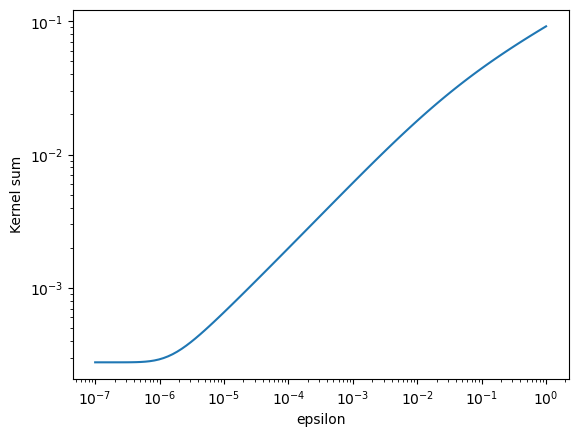

In [19]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(epsilons,ksums)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Kernel sum")
ax.set_xlabel("epsilon")

In [20]:
diffs = np.diff(np.log10(ksums))
# diffs = np.diff(diffs)

Text(0.5, 0, 'epsilon')

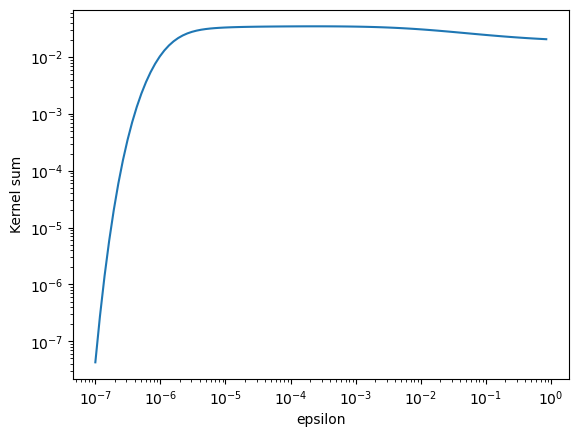

In [21]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(epsilons[0:-1],diffs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Kernel sum")
ax.set_xlabel("epsilon")

In [22]:
opt_index = np.argmax(diffs)

In [23]:
opt_index

48

# Free energy plot

# Plot transition rates

Note that we need to multiply rates by 10 to account for the 10/ps friction coefficient in simulating Langevin dynamics. Another point to be noted is that the friction coefficient WILL NOT affect the target measure because the friction coefficients cancel out when multiplying beta by the free energy in the exponential formula! 

In [24]:
trs = data_sim['transition_rates']
data_sim = dict(data_sim)

In [25]:
ones_vec = np.ones(epsilons.shape)

In [26]:
avg_rate = 0.011399068097111019
std_dev = 0.0003161231161831333

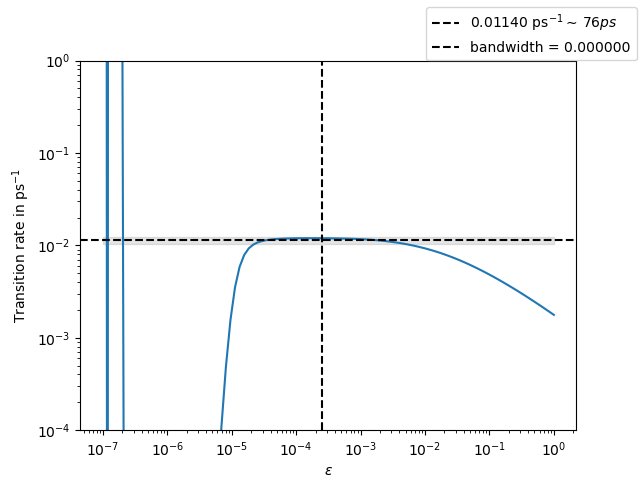

In [27]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(epsilons,trs) # multiply by 2 to adjust for the accidental factor of 2 in computing the rate. multiply by 12/10 as friction--mass ratio. 
ax.fill_between(epsilons, (avg_rate - 3*std_dev)*ones_vec, (avg_rate + 3*std_dev)*ones_vec, color='k', alpha=0.1)
ax.axhline(avg_rate, c='k', linestyle='--', label=r'0.01140 ps$^{-1} \sim \, 76 ps$')
ax.axvline(epsilons[opt_index], c='k', linestyle='--', label=f'bandwidth = {epsilons[8]:.6f}')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-4,1e0])
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel(r"Transition rate in ps$^{-1}$")
fig.legend()
# data['transition_rates']

In [31]:
trs[opt_index+1]

0.011916385938631348